# Filtering for reduce the noise in the image
Generate random integers from 0 to 20
If the value is zero we will replace the image pixel with a low value of 0 that
corresponds to a black pixel.
If the value is 20 we will replace the image pixel with a high value of 255 that
corresponds to a white pixel.
We have taken 20 integers, out of which we will only tag integers 1 and 20 as salt and
pepper noise.
Hence, approximately 10% of the overall pixels are salt and pepper noise. If we want to reduce it to 5% we can take integers from 0 to 40 and then treat 0 as an indicator for a black pixel and 40 as an indicator for a white pixel.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
import scipy.signal

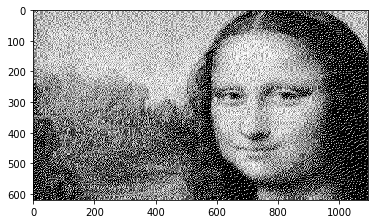

In [41]:
img = cv2.imread('/home/denocris/dli-lects_backup/images/monalisa2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")


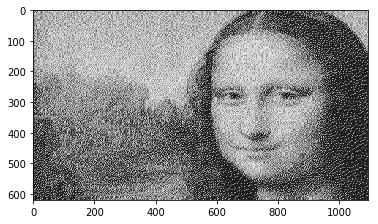

In [49]:
mean = 0
var = 100
sigma = var**0.5
row,col = 620,1094
gauss = np.random.normal(mean, sigma,(row,col))
gray_noisy = gray + gauss
plt.imshow(gray_noisy,cmap='gray')

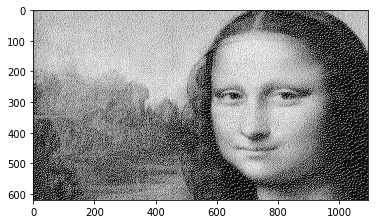

In [50]:
# Mean Filter, Gm rappresent the convolution
Hm = np.array([[1,1,1],[1,1,1],[1,1,1]])/float(9)
Gm = scipy.signal.convolve2d(gray_noisy,Hm,mode='same')
plt.imshow(Gm,cmap='gray')

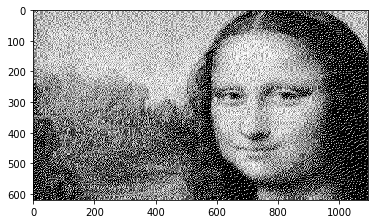

In [75]:
np.random.seed(0)
gray_sp = gray*1
sp_indices = np.random.randint(0,21,[row,col])
for i in range(row):
    for j in range(col):
        if sp_indices[i,j] == 0:
            gray_sp[i,j] == 0
        if sp_indices[i,j] == 20:
            gray_sp[i,j] == 250
plt.imshow(gray_sp, cmap="gray")
    

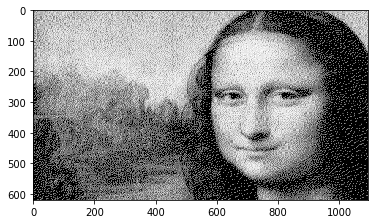

In [76]:
## Now we want to remove the salt and pepper noise through a Median filter.
## Using the opencv Median filter for the same
gray_sp_removed = cv2.medianBlur(gray_sp,3)
plt.imshow(gray_sp_removed,cmap="gray")

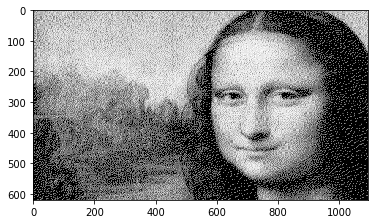

In [61]:
# implementation of the 3*3 median filter without using opencv
gray_sp_removed_exp = gray*1
for i in range(row):
    for j in range(col):
        local_arr = []
        for k in range(np.max([0,i-1]),np.min([i+2,row])):
            for l in range(np.max([0,j-1]),np.min([j+2,col])):
                local_arr.append(gray_sp[k,l])
        gray_sp_removed_exp[i,j] = np.median(local_arr)
plt.imshow(gray_sp_removed_exp,cmap="gray")

            
    